<font size= 10> **Prospect Theory SWB Model Parameter Recovery**


Goal of SWB prospect theory models is to capture individual subject's risk aversion, loss aversion, and choice probability to generate utility-based expected values of each trial for each subject. If recoverable, these models will be used to estimate subjective wellbeing ratings. Here, models are recovered independent from ratings. 

## SWB Decision Models:
1. Base PT Model
    - free params: loss aversion, risk aversion, temp
2. Dual Risk Aversion PT Model:
    - free params: loss aversion, gain risk aversion, loss risk aversion, temp

-------- Fit to SWB data before continuing to determine whether following models should include one or two risk aversion parameters ---------

3. Approach Avoidance Model:
    - free params: loss aversion, risk aversion, temp, gain bias, loss bias, optional mix bias
4. Gain-Loss Learning PT Model:
    - free params: loss aversion, risk aversion, temp, gain theta, loss theta, optional mix theta
5. Null Models:
    - free params: temp, alternate leaving out loss aversion and risk aversion

In [1]:
import random
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.optimize import minimize # minimize function is used for parameter recovery 
import seaborn as sns 
import tqdm
from scipy.stats import pearsonr
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('/Users/alexandrafink/Documents/GraduateSchool/SaezLab/SWB/swb_computational_modelling/scripts/')
import SWB_modeling_utils

Getting beta distribution values for parameter initialization:

In [ ]:
#https://en.wikipedia.org/wiki/Beta_distribution
#https://numpy.org/doc/stable/reference/random/generated/numpy.random.beta.html

In [4]:
test = pd.read_excel('/Users/alexandrafink/Documents/GraduateSchool/SaezLab/SWB/swb_computational_modelling/data/DATA_for_JASP_Anxiety.xlsx')

(array([18.,  8.,  9.,  5.,  3.,  2.,  1.,  0.,  1.,  1.]),
 array([ 0.0477658 ,  2.03852688,  4.02928796,  6.02004904,  8.01081012,
        10.0015712 , 11.99233229, 13.98309337, 15.97385445, 17.96461553,
        19.95537661]),
 <BarContainer object of 10 artists>)

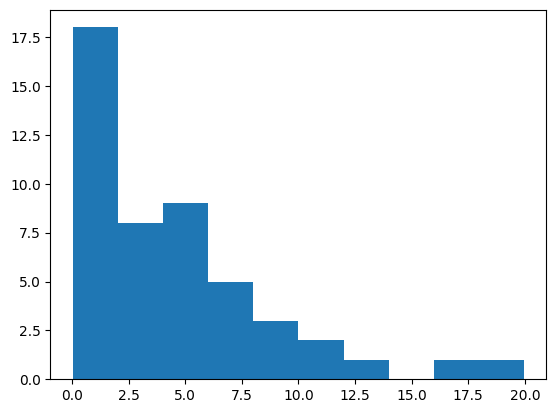

In [16]:
plt.hist(test.Mu) #looks like a=1 b=8 beta dist

In [28]:
N = 100 # sample size
a = 1  # shape parameter a
b = 8  # shape parameter b
lower_bound = 0
upper_bound = 20
inv_temps = (upper_bound - lower_bound) * np.random.beta(a, b, N) + lower_bound



(array([26., 23., 14., 13.,  7.,  7.,  3.,  3.,  1.,  3.]),
 array([5.03534420e-03, 9.21363987e-01, 1.83769263e+00, 2.75402127e+00,
        3.67034991e+00, 4.58667856e+00, 5.50300720e+00, 6.41933584e+00,
        7.33566449e+00, 8.25199313e+00, 9.16832177e+00]),
 <BarContainer object of 10 artists>)

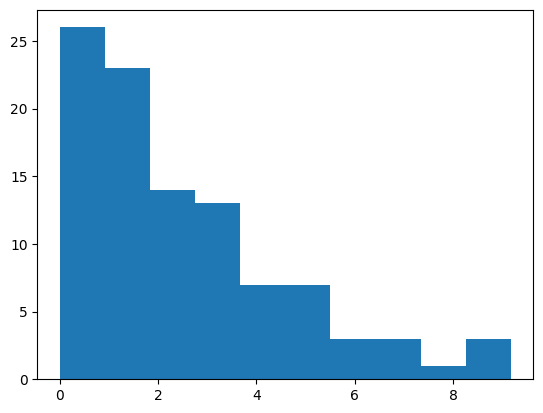

In [29]:
plt.hist(inv_temps) #validating hypothesized beta distribution 

(array([ 3.,  6., 12.,  9.,  8.,  7.,  0.,  2.,  0.,  1.]),
 array([0.89323327, 1.21436727, 1.53550127, 1.85663527, 2.17776926,
        2.49890326, 2.82003726, 3.14117125, 3.46230525, 3.78343925,
        4.10457324]),
 <BarContainer object of 10 artists>)

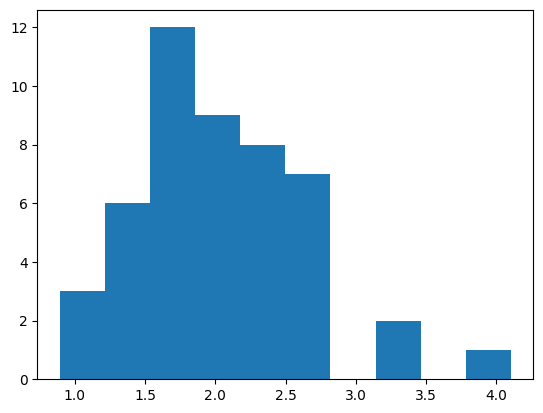

In [21]:
plt.hist(test.Lambda) #looks closer to normal a=2 b =4? 

In [42]:
N = 100 # sample size
a = 2  # shape parameter a
b = 4  # shape parameter b
lower_bound = 0
upper_bound = 5
lams = (upper_bound - lower_bound) * np.random.beta(a, b, N) + lower_bound


(array([11.,  9., 17., 17., 13.,  9., 11.,  8.,  2.,  3.]),
 array([0.26755437, 0.64481628, 1.0220782 , 1.39934012, 1.77660203,
        2.15386395, 2.53112587, 2.90838778, 3.2856497 , 3.66291162,
        4.04017353]),
 <BarContainer object of 10 artists>)

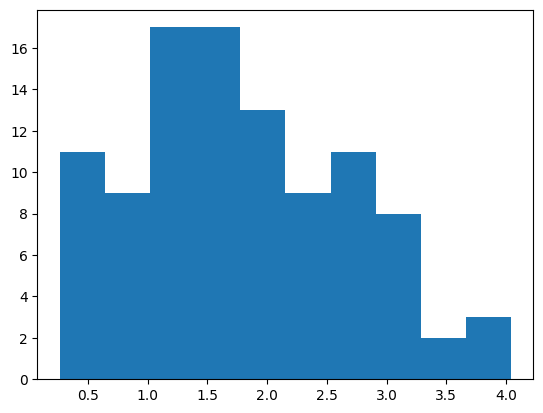

In [43]:
plt.hist(lams)

(array([23.,  6.,  6.,  8.,  1.,  1.,  1.,  0.,  1.,  1.]),
 array([0.28856835, 0.49359893, 0.6986295 , 0.90366008, 1.10869066,
        1.31372124, 1.51875182, 1.72378239, 1.92881297, 2.13384355,
        2.33887413]),
 <BarContainer object of 10 artists>)

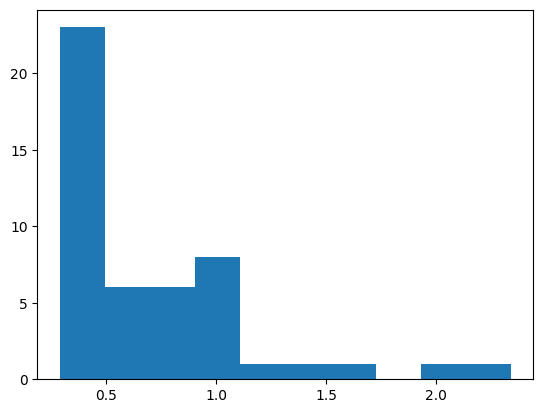

In [22]:
plt.hist(test.Rho) #looks like 1 9 beta distribution

In [30]:
N = 100 # sample size
a = 1  # shape parameter a
b = 9  # shape parameter b
lower_bound = 0
upper_bound = 3
rhos = (upper_bound - lower_bound) * np.random.beta(a, b, N) + lower_bound


(array([39., 20., 14.,  7.,  9.,  2.,  6.,  2.,  0.,  1.]),
 array([0.00608346, 0.1458943 , 0.28570514, 0.42551598, 0.56532682,
        0.70513766, 0.8449485 , 0.98475934, 1.12457018, 1.26438102,
        1.40419186]),
 <BarContainer object of 10 artists>)

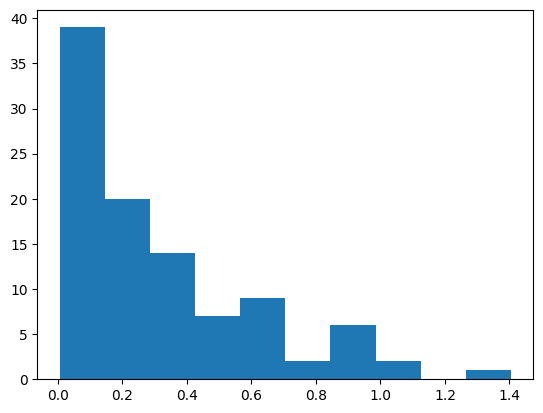

In [31]:
plt.hist(rhos)

In [14]:
test

,ID,Mu,Lambda,Rho,Log Mu,Log Loss Aversion (=Log Lambda),Log Risk Aversion (= -Log Rho),Mu MAP,Lambda MAP,Rho MAP,...,Memory RT gamble gain-only,Memory RT safe gain-only,Memory RT mixed happy,Memory RT mixed fearful,Memory RT mixed neutral,Memory RT mixed object,Memory RT gain-only happy,Memory RT gain-only fearful,Memory RT gain-only neutral,Memory RT gain-only object
0,101,5.903777,1.518513,0.455543,1.775592,0.417732,0.786265,5.787447,1.526465,0.460361,...,0.719400,0.768711,0.836489,0.790917,0.785042,0.851136,0.796261,0.736545,0.762227,0.787696
1,103,0.711030,2.135983,0.999249,-0.341041,0.758927,0.000751,0.758615,2.100183,0.978204,...,0.697879,0.548522,0.534224,0.566633,0.622857,0.649429,0.571640,0.564960,0.637080,0.617560
2,104,7.906302,2.090543,0.360130,2.067660,0.737424,1.021290,7.715798,2.095375,0.360503,...,0.904083,0.854304,0.843042,0.812347,0.751449,0.850750,0.793083,0.865833,0.884792,0.933143
3,105,3.700953,3.375923,0.384483,1.308590,1.216669,0.955855,4.215022,2.974884,0.328743,...,0.694667,0.670223,0.719082,0.701396,0.624735,0.638531,0.692920,0.690200,0.627880,0.675760
4,106,5.314835,1.612572,0.345016,1.670502,0.477830,1.064166,5.266382,1.617154,0.345814,...,0.745167,0.789449,0.817796,0.816000,0.842469,0.821146,0.775040,0.810167,0.757200,0.763080
5,107,7.811966,1.294114,0.372040,2.055657,0.257827,0.988754,7.666140,1.295810,0.373189,...,0.754773,0.745403,0.698061,0.702939,0.695396,0.746667,0.680640,0.707875,0.710680,0.889160
6,108,6.005726,2.315533,0.355252,1.792713,0.839640,1.034927,5.978647,2.312659,0.354989,...,0.712111,0.711758,0.699354,0.742857,0.730857,0.767574,0.704280,0.698560,0.608960,0.835360
7,110,3.365204,2.590872,0.480158,1.213489,0.951994,0.733640,3.463795,2.546262,0.473257,...,0.927750,0.958165,0.969255,1.004122,0.951043,0.900653,0.957208,0.914500,0.944920,1.001375
8,111,8.345419,1.523710,0.299816,2.121713,0.421148,1.204587,8.127667,1.528758,0.300566,...,0.866417,0.836651,0.761857,0.770735,0.810604,0.875021,0.832440,0.870960,0.813000,0.843409
9,113,0.211724,2.301063,1.641033,-1.552471,0.833371,-0.495326,0.284812,2.194417,1.525382,...,0.680882,0.662735,0.687306,0.633735,0.684510,0.708367,0.652560,0.681520,0.653200,0.700680


### Testing softmax equation: 
- Shawn splits into pgamble/psafe with slightly different equations but charpentier and rutledge just have pgamble 
- Validating that both forms of the equation produce the same results to validate future simulations 

In [156]:
#free params to test softmax formula:
risk_aversion = 0.7
loss_aversion = 2.1
inverse_temp = 1.1

In [157]:
#test softmax eq - loss trial

low_bet = round(random.uniform(-3.0,-0.34),2)
safe_bet = round(random.uniform(-0.2,-0.6),2)
while safe_bet <= low_bet:
    safe_bet = round(random.uniform(-0.2,-0.6),2) #need to constrain to always be greater than low bet!!!
high_bet = 0

weighted_high_bet = 0
weighted_low_bet = -0.5 * loss_aversion * (-low_bet)**risk_aversion
util_gamble = weighted_high_bet + weighted_low_bet
util_safe = -loss_aversion * (-safe_bet)**risk_aversion

#softmax option 1
p_gamble1 = np.exp(inverse_temp*util_gamble) / ( np.exp(inverse_temp*util_gamble) + np.exp(inverse_temp*util_safe) )
p_safe1 = np.exp(inverse_temp*util_safe) / ( np.exp(inverse_temp*util_gamble) + np.exp(inverse_temp*util_safe) )

print('The p_gamble for equation 1 is ', p_gamble1, 'and the p_safe is ', p_safe1)

#softmax option 2
p_gamble2 = 1 / ( 1 + np.exp(-inverse_temp*(util_gamble - util_safe)))
p_safe2 = (1-p_gamble2)

print('The p_gamble for equation 1 is ', p_gamble1, 'and the p_safe is ', p_safe2)


The p_gamble for equation 1 is  0.35223217093576314 and the p_safe is  0.6477678290642369
The p_gamble for equation 1 is  0.35223217093576314 and the p_safe is  0.6477678290642368


In [158]:

#test softmax eq - mix trial
safe_bet = 0
low_bet = round(random.uniform(-1.5,-0.3),2) 
high_bet = round(random.uniform(3.0,0.06),2) 

weighted_high_bet = 0.5 * (high_bet)**risk_aversion
weighted_low_bet = -0.5 * loss_aversion * (-low_bet)**risk_aversion
util_gamble = weighted_high_bet + weighted_low_bet
util_safe = (safe_bet)**risk_aversion

#softmax option 1
p_gamble1 = np.exp(inverse_temp*util_gamble) / ( np.exp(inverse_temp*util_gamble) + np.exp(inverse_temp*util_safe) )
p_safe1 = np.exp(inverse_temp*util_safe) / ( np.exp(inverse_temp*util_gamble) + np.exp(inverse_temp*util_safe) )

print('The p_gamble for equation 1 is ', p_gamble1, 'and the p_safe is ', p_safe1)

#softmax option 2
p_gamble2 = 1 / ( 1 + np.exp(-inverse_temp*(util_gamble - util_safe)))
p_safe2 = (1-p_gamble2)

print('The p_gamble for equation 1 is ', p_gamble1, 'and the p_safe is ', p_safe2)


The p_gamble for equation 1 is  0.4294124768028908 and the p_safe is  0.5705875231971091
The p_gamble for equation 1 is  0.4294124768028908 and the p_safe is  0.5705875231971091


In [159]:
#test softmax eq - gain trial

high_bet = round(random.uniform(0.34,3.0),2) 
safe_bet = round(random.uniform(0.2,0.6),2) #need to constrain to always be less than high bet!!!
while safe_bet >= high_bet:
    safe_bet = round(random.uniform(0.2,0.6),2) #need to constrain to always be less than high bet!!!
low_bet = 0

weighted_high_bet = 0.5 * (high_bet)**risk_aversion
weighted_low_bet = 0
util_gamble = weighted_high_bet + weighted_low_bet
util_safe = (safe_bet)**risk_aversion

#softmax option 1
p_gamble1 = np.exp(inverse_temp*util_gamble) / ( np.exp(inverse_temp*util_gamble) + np.exp(inverse_temp*util_safe) )
p_safe1 = np.exp(inverse_temp*util_safe) / ( np.exp(inverse_temp*util_gamble) + np.exp(inverse_temp*util_safe) )

print('The p_gamble for equation 1 is ', p_gamble1, 'and the p_safe is ', p_safe1)

#softmax option 2
p_gamble2 = 1 / ( 1 + np.exp(-inverse_temp*(util_gamble - util_safe)))
p_safe2 = (1-p_gamble2)

print('The p_gamble for equation 1 is ', p_gamble1, 'and the p_safe is ', p_safe2)

The p_gamble for equation 1 is  0.578505764527301 and the p_safe is  0.42149423547269893
The p_gamble for equation 1 is  0.578505764527301 and the p_safe is  0.42149423547269904


<font size= 8> **Simulation**

### Simulation Evaluation (for each model): 

1. Input known parameters into the model and use the model to simulate data
2. For decision-only models, gamble decision behavior will be simulated. For happiness models, mood ratings will also be simulated based on simulated gamble behavior + outcomes generated by the model. 

## Simulation for Model 1: Base PT Model
- free params (3): risk aversion, loss aversion, temp


In [160]:
#run test simulation with 1 rep

#high loss aversion (>1), low loss aversion (<1), high risk seeking if risk aversion (>1), low risk aversion more risk averse(<1), inverse temp from 0 (completely random responding) to infinity (deterministically choosing the highest value option)
df=SWB_modeling_utils.pt_base_simulation((1.25,0.8,2),1,150) # slighty risk averse, not loss averse, one iteration, 150 trials
#sanity check df to make sure safe,high,low bets are logical 
df

,rep,tr,type,choice_pred,choice_prob,util_gamble,util_safe,p_gamble,p_safe,safe_bet,high_bet,low_bet
0,0,0,gain,[gamble],0.064961,1.501382,0.167983,0.935039,0.064961,0.24,2.41,0.00
1,0,1,gain,[safe],0.282910,0.843868,0.378833,0.717090,0.282910,0.46,1.52,0.00
2,0,2,gain,[gamble],0.255149,0.843868,0.308199,0.744851,0.255149,0.39,1.52,0.00
3,0,3,mix,[gamble],0.060175,1.374218,0.000000,0.939825,0.060175,0.00,2.58,-0.71
4,0,4,gain,[gamble],0.073918,1.642838,0.378833,0.926082,0.073918,0.46,2.59,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,145,loss,[safe],0.786380,-0.874706,-0.223084,0.213620,0.786380,-0.36,0.00,-1.87
146,0,146,loss,[gamble],0.865176,-1.114531,-0.185051,0.134824,0.865176,-0.31,0.00,-2.27
147,0,147,mix,[gamble],0.182025,0.751342,0.000000,0.817975,0.182025,0.00,1.52,-0.31
148,0,148,mix,[gamble],0.145129,0.886666,0.000000,0.854871,0.145129,0.00,2.15,-1.03


Simulating 100 repetitions of a slightly risk seeking, loss averse patient

In [44]:
#free parameters (3): risk aversion, loss aversion, inverse temperature

number_of_trials = 150
number_of_reps = 100


risk_aversion = 0.7 #>1 means more sensitive to value, <1 is less sensitive to value
loss_aversion = 2.1
temp = 1.15
base_pt_sim_df = SWB_modeling_utils.pt_base_simulation((risk_aversion,loss_aversion,temp),number_of_reps,number_of_trials)
  

In [45]:
base_pt_sim_df

,rep,tr,type,choice_pred,choice_prob,util_gamble,util_safe,p_gamble,p_safe,safe_bet,high_bet,low_bet
0,0,0,gain,gamble,0.521970,0.506979,0.430512,0.521970,0.478030,0.30,1.02,0.00
1,0,1,loss,gamble,0.408919,-1.093713,-0.773334,0.408919,0.591081,-0.24,0.00,-1.06
2,0,2,mix,safe,0.719383,-0.818613,0.000000,0.280617,0.719383,0.00,0.41,-1.05
3,0,3,mix,gamble,0.609065,0.385551,0.000000,0.609065,0.390935,0.00,2.78,-0.49
4,0,4,gain,gamble,0.448056,0.307786,0.489116,0.448056,0.551944,0.36,0.50,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,99,145,gain,safe,0.519652,0.581253,0.649644,0.480348,0.519652,0.54,1.24,0.00
14996,99,146,loss,gamble,0.581823,-0.759850,-1.047033,0.581823,0.418177,-0.37,0.00,-0.63
14997,99,147,gain,safe,0.496873,0.626448,0.615572,0.503127,0.496873,0.50,1.38,0.00
14998,99,148,loss,safe,0.710848,-1.829211,-1.047033,0.289152,0.710848,-0.37,0.00,-2.21


### Simulation Evaluation:

1. Do utilities make sense based on known input parameters?
2. Do choices make sense based on known inverse temperature?
3. Do utilities make sense based on offer values? 
4. Do probabilities make sense based on utilities?
5. Do choices make sense based on probabilities?

Check if descriptive statistics of utilities and probabilities make sense based on known parameters

In [46]:
#descriptive statistics of utilities and probabilities

util_gamble_mean = base_pt_sim_df.util_gamble.mean()
print('The mean estimated gamble utiliy for a highly loss averse patient is',util_gamble_mean) #should be higher with higher risk aversion parameter


util_safe_mean = base_pt_sim_df.util_safe.mean()
print('The mean estimated safe utiliy for a highly loss averse patient is', util_safe_mean) #safe utility trends towards zero

The mean estimated gamble utiliy for a highly loss averse patient is -0.35472205604582
The mean estimated safe utiliy for a highly loss averse patient is -0.1833086786909902


In [47]:
summary = base_pt_sim_df.groupby(by='type').mean()

In [48]:
summary #safe util should be 0 for mix

,rep,tr,choice_prob,util_gamble,util_safe,p_gamble,p_safe,safe_bet,high_bet,low_bet
type,,,,,,,,,,
gain,50.000992,73.827744,0.515576,0.698997,0.517425,0.550966,0.449034,0.395448,1.672639,0.000000
loss,49.663636,75.022828,0.557441,-1.461165,-1.082209,0.401165,0.598835,-0.393020,0.000000,-1.662814
mix,48.834564,74.659549,0.534538,-0.321354,0.000000,0.412759,0.587241,0.000000,1.497889,-0.896905


Split df by trial type to validate that offers match with estimated utilities

In [49]:
#split df by trial type 
base_pt_loss_df = base_pt_sim_df[base_pt_sim_df['type']=='loss']
base_pt_mix_df = base_pt_sim_df[base_pt_sim_df['type']=='mix']
base_pt_gain_df = base_pt_sim_df[base_pt_sim_df['type']=='gain']

Text(0.5, 1.0, 'Loss Trials Safe Bet Offers x Safe Utilities')

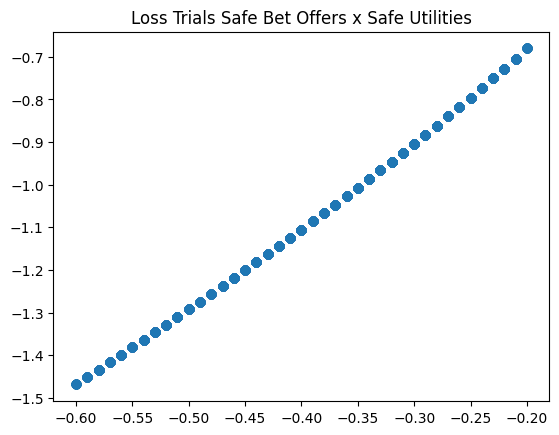

In [50]:
#check safe bets vs utilities for loss, mix, gain trials
plt.scatter(base_pt_loss_df.safe_bet, base_pt_loss_df.util_safe)
plt.title('Loss Trials Safe Bet Offers x Safe Utilities')


Text(0.5, 1.0, 'Mix Trials Safe Bet Offers x  Safe Utilities')

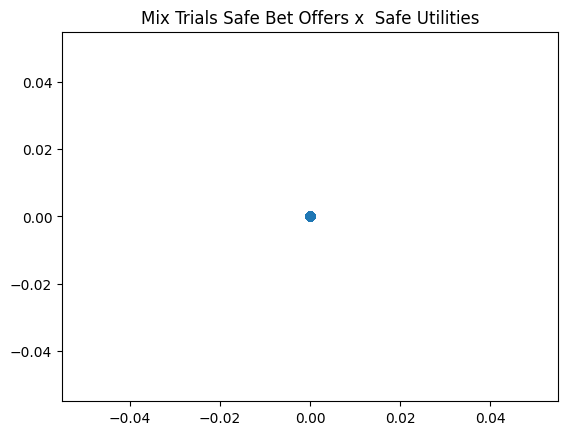

In [51]:
plt.scatter(base_pt_mix_df.safe_bet, base_pt_mix_df.util_safe)
plt.title('Mix Trials Safe Bet Offers x  Safe Utilities')

Text(0.5, 1.0, 'Gain Trials Safe Bet Offers x Safe Utilities')

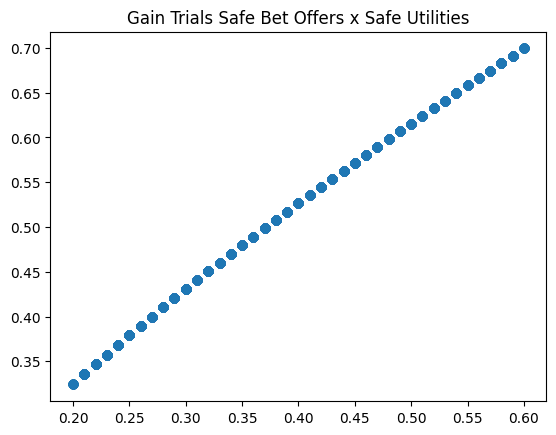

In [52]:
plt.scatter(base_pt_gain_df.safe_bet, base_pt_gain_df.util_safe)
plt.title('Gain Trials Safe Bet Offers x Safe Utilities')

Text(0.5, 1.0, 'Loss Trials Safe Bet Offers x Safe Utilities')

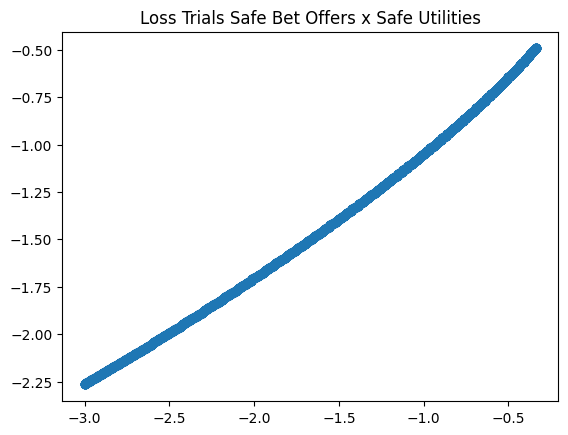

In [53]:
#check gamble bets vs utilities for loss, mix, gain trials
plt.scatter(base_pt_loss_df.low_bet, base_pt_loss_df.util_gamble)
plt.title('Loss Trials Safe Bet Offers x Safe Utilities')


Text(0.5, 1.0, 'Mix Trials Low Bet Offers x Gamble Utilities')

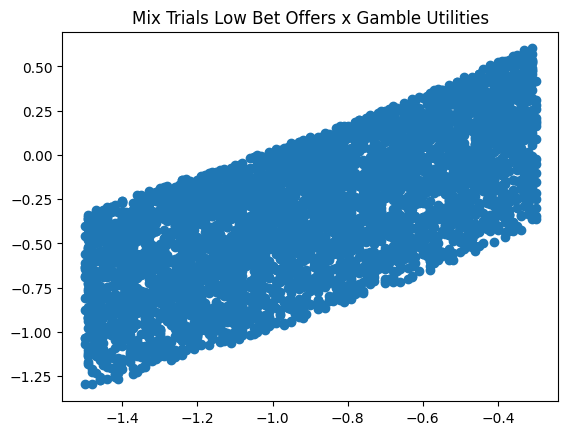

In [54]:
#check gamble low bets vs utilities for mix trials
plt.scatter(base_pt_mix_df.low_bet, base_pt_mix_df.util_gamble)
plt.title('Mix Trials Low Bet Offers x Gamble Utilities')


Text(0.5, 1.0, 'Mix Trials High Bet Offers x Gamble Utilities')

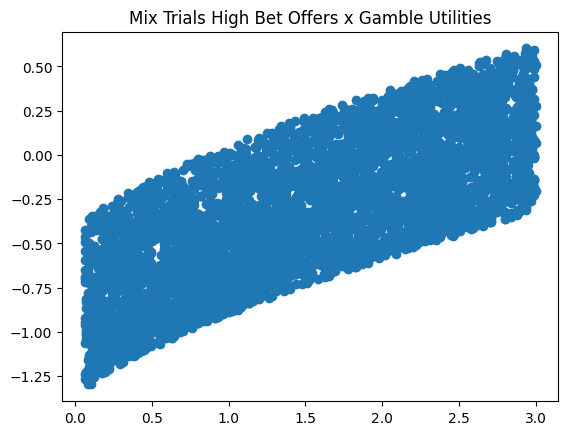

In [55]:
#check gamble high bets vs utilities for mix trials
plt.scatter(base_pt_mix_df.high_bet, base_pt_mix_df.util_gamble)
plt.title('Mix Trials High Bet Offers x Gamble Utilities')

Text(0.5, 1.0, 'Gain Trials High Bet Offers x Gamble Utilities')

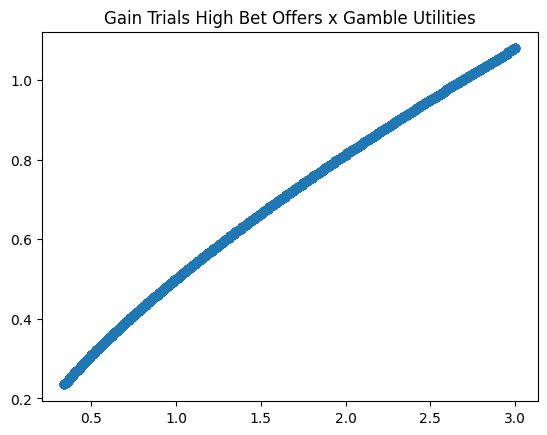

In [56]:
#check gamble high bets vs utilities for gain trials
plt.scatter(base_pt_gain_df.high_bet, base_pt_gain_df.util_gamble)
plt.title('Gain Trials High Bet Offers x Gamble Utilities')

For all trials, do utilities make sense based on offer values? 

Text(0.5, 1.0, 'All Trials Safe Bet Offers x Safe Bet Utilities')

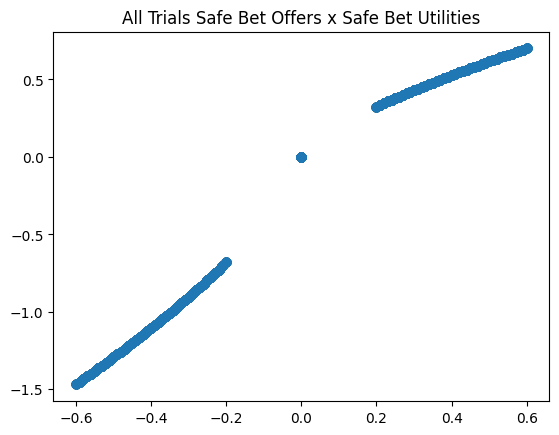

In [57]:
#Do utilities make sense based on offer values? 

plt.scatter(base_pt_sim_df.safe_bet, base_pt_sim_df.util_safe)
plt.title('All Trials Safe Bet Offers x Safe Bet Utilities')



Text(0.5, 1.0, 'All Trials Gamble Expected Value x Gamble Utilities')

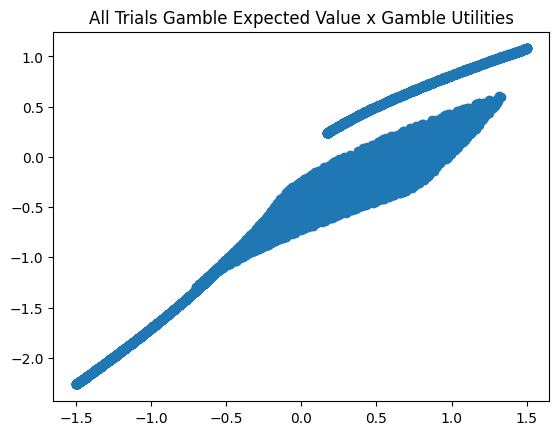

In [58]:
util_gamble_average = (base_pt_sim_df.high_bet+base_pt_sim_df.low_bet)/2

plt.scatter(util_gamble_average, base_pt_sim_df.util_gamble)
plt.title('All Trials Gamble Expected Value x Gamble Utilities')


Do probabilities maek sense based on utilities? 

Text(0.5, 1.0, 'Safe Bet Probability x Utilities')

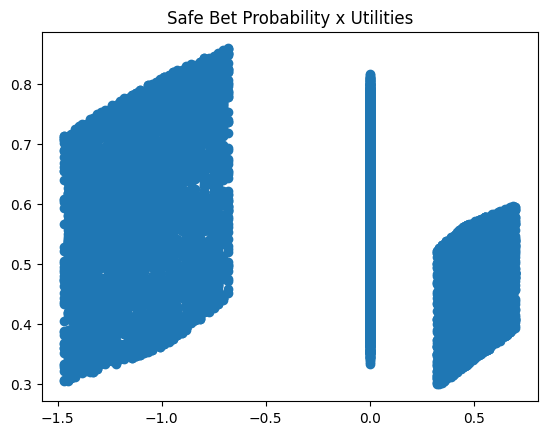

In [59]:
#Do probabilities make sense based on utilities?
plt.scatter(base_pt_sim_df.util_safe, base_pt_sim_df.p_safe)
plt.title('Safe Bet Probability x Utilities')


Text(0.5, 1.0, 'Gamble Bet Probability x Utilities')

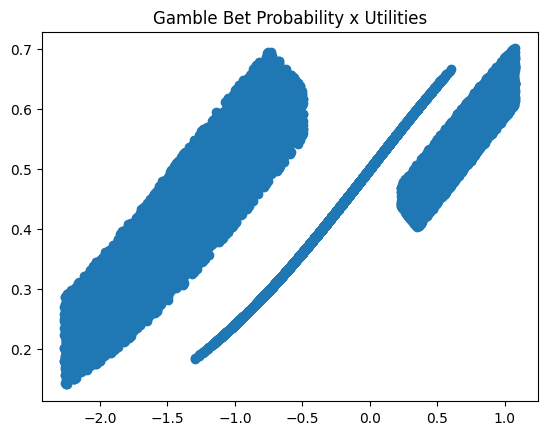

In [60]:
plt.scatter(base_pt_sim_df.util_gamble, base_pt_sim_df.p_gamble)
plt.title('Gamble Bet Probability x Utilities')


Do choices make sense based on offers?


In [212]:
base_pt_sim_df

,rep,tr,type,choice_pred,choice_prob,util_gamble,util_safe,p_gamble,p_safe,safe_bet,high_bet,low_bet
0,0,0,loss,safe,0.486579,-1.281992,-1.328684,0.513421,0.486579,-0.52,0.00,-1.33
1,0,1,mix,safe,0.552647,-0.183802,0.000000,0.447353,0.552647,0.00,0.82,-0.47
2,0,2,mix,safe,0.451089,0.170672,0.000000,0.548911,0.451089,0.00,1.50,-0.34
3,0,3,mix,gamble,0.417507,-0.289578,0.000000,0.417507,0.582493,0.00,1.77,-0.98
4,0,4,mix,safe,0.591901,-0.323329,0.000000,0.408099,0.591901,0.00,2.79,-1.43
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,99,145,gain,gamble,0.625593,0.906611,0.460214,0.625593,0.374407,0.33,2.34,0.00
14996,99,146,loss,safe,0.655421,-1.420541,-0.861450,0.344579,0.655421,-0.28,0.00,-1.54
14997,99,147,mix,safe,0.797762,-1.193358,0.000000,0.202238,0.797762,0.00,0.26,-1.49
14998,99,148,loss,safe,0.784326,-2.228418,-1.105761,0.215674,0.784326,-0.40,0.00,-2.93


In [61]:
loss,mix,gain = SWB_modeling_utils.simulation_norm_gamble_choices(base_pt_sim_df)


In [62]:
gamble_plot = pd.DataFrame(columns=['loss_x','loss_y','mix_x','mix_y','gain_x','gain_y'])

df={}
df['loss_x'] = loss['loss_x_axis']
df['loss_y'] = loss['loss_choice_props']

df['mix_x'] = mix['mix_x_axis']
df['mix_y'] =  mix['mix_choice_props']

df['gain_x'] = gain['gain_x_axis']
df['gain_y'] = gain['gain_choice_props']

gamble_plot = pd.concat([gamble_plot,pd.DataFrame(df)])

gamble_plot = gamble_plot.dropna(axis=0)

/Users/alexandrafink/opt/anaconda3/envs/swb_computational_modelling/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/alexandrafink/opt/anaconda3/envs/swb_computational_modelling/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/alexandrafink/opt/anaconda3/envs/swb_computational_modelling/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/alexandrafink/opt/anaconda3/envs/swb_computational_modelling/lib/python3

Text(0.5, 1.05, 'Influence of Expected Value on Gamble Decision')

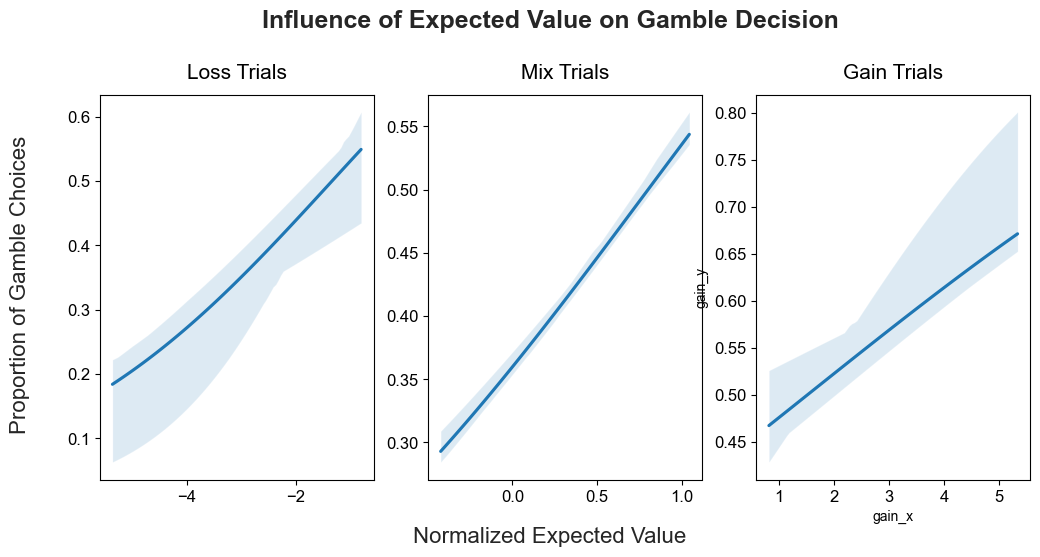

In [63]:
#Do choices make sense based on offers?

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,5))
sns.set_theme(style='ticks',font='Arial') #magma_r,gnuplot,paired,cubehelix_r
sns.regplot(data=gamble_plot,ax=ax1,x='loss_x',y='loss_y',ci=95,logistic=True,scatter=False)
sns.regplot(data=gamble_plot,ax=ax2,x='mix_x',y='mix_y',ci=95,logistic=True,scatter=False)
sns.regplot(data=gamble_plot,ax=ax3,x='gain_x',y='gain_y',ci=95,logistic=True,scatter=False)
ax1.set_ylabel(None)
ax1.set_xlabel(None)
ax1.tick_params(labelsize=12)
ax1.set_title('Loss Trials',weight='medium',fontsize=15,y=1.02)
ax2.set_ylabel(None)
ax2.set_xlabel(None)
ax2.tick_params(labelsize=12)
ax2.set_title('Mix Trials',weight='medium',fontsize=15,y=1.02)
ax3.tick_params(labelsize=12)
ax3.set_title('Gain Trials',weight='medium',fontsize=15,y=1.02)
fig.supxlabel('Normalized Expected Value',y=-0.025,weight='medium',fontsize=16)
fig.supylabel('Proportion of Gamble Choices',x=0.05,weight='medium',fontsize=16)
fig.suptitle('Influence of Expected Value on Gamble Decision',y=1.05,weight='semibold',fontsize=18)

Do choices make sense based on utilities? 

In [64]:

loss_util,mix_util,gain_util = SWB_modeling_utils.simulation_util_norm_gamble_choices(base_pt_sim_df)


In [65]:
gamble_plot_util = pd.DataFrame(columns=['loss_x','loss_y','mix_x','mix_y','gain_x','gain_y'])

df_util={}
df_util['loss_x'] = loss_util['loss_x_axis']
df_util['loss_y'] = loss_util['loss_choice_props']

df_util['mix_x'] = mix_util['mix_x_axis']
df_util['mix_y'] =  mix_util['mix_choice_props']

df_util['gain_x'] = gain_util['gain_x_axis']
df_util['gain_y'] = gain_util['gain_choice_props']

gamble_plot_util = pd.concat([gamble_plot_util,pd.DataFrame(df_util)])

gamble_plot_util = gamble_plot_util.dropna(axis=0)

/Users/alexandrafink/opt/anaconda3/envs/swb_computational_modelling/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/alexandrafink/opt/anaconda3/envs/swb_computational_modelling/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/alexandrafink/opt/anaconda3/envs/swb_computational_modelling/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/alexandrafink/opt/anaconda3/envs/swb_computational_modelling/lib/python3

Text(0.5, 1.05, 'Influence of Gamble Utility on Decision')

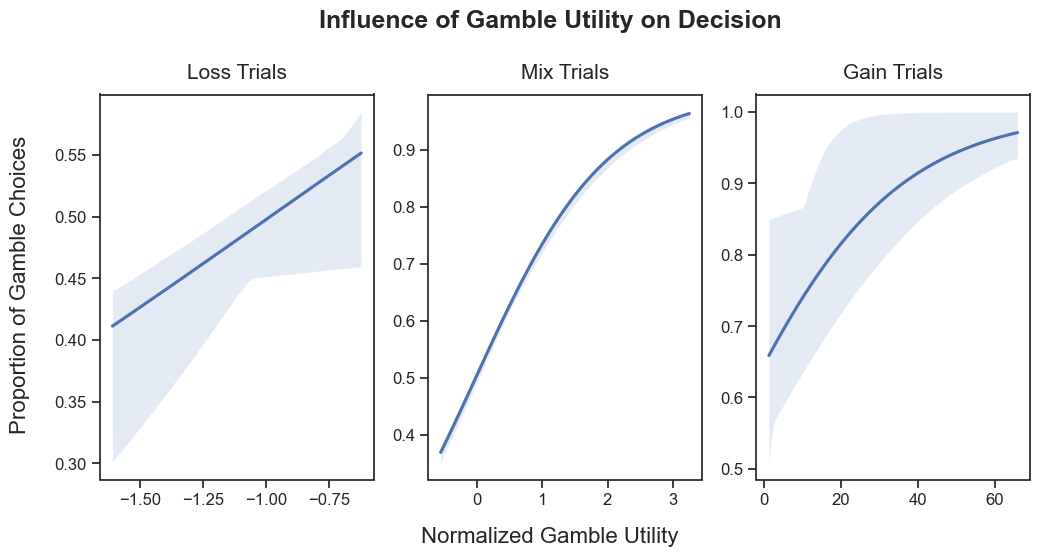

In [96]:
#Do choices make sense based on utilities?

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,5))
sns.set_theme(style='ticks',font='Arial') #magma_r,gnuplot,paired,cubehelix_r
sns.regplot(data=gamble_plot_util,ax=ax1,x='loss_x',y='loss_y',ci=95,logistic=True,scatter=False)
sns.regplot(data=gamble_plot_util,ax=ax2,x='mix_x',y='mix_y',ci=95,logistic=True,scatter=False)
sns.regplot(data=gamble_plot_util,ax=ax3,x='gain_x',y='gain_y',ci=95,logistic=True,scatter=False)
ax1.set_ylabel(None)
ax1.set_xlabel(None)
ax1.tick_params(labelsize=12)
ax1.set_title('Loss Trials',weight='medium',fontsize=15,y=1.02)
ax2.set_ylabel(None)
ax2.set_xlabel(None)
ax2.tick_params(labelsize=12)
ax2.set_title('Mix Trials',weight='medium',fontsize=15,y=1.02)
ax3.set_ylabel(None)
ax3.set_xlabel(None)
ax3.tick_params(labelsize=12)
ax3.set_title('Gain Trials',weight='medium',fontsize=15,y=1.02)
fig.supxlabel('Normalized Gamble Utility',y=-0.025,weight='medium',fontsize=16)
fig.supylabel('Proportion of Gamble Choices',x=0.05,weight='medium',fontsize=16)
fig.suptitle('Influence of Gamble Utility on Decision',y=1.05,weight='semibold',fontsize=18)

## Simulation for Model 2: Dual Risk Aversion PT Model
- free params (4): gain risk aversion, loss risk aversion, loss aversion, temp


In [75]:
#free parameters: loss aversion, risk aversion for gain, risk aversion for loss inverse temperature

number_of_trials = 150
number_of_reps = 100


loss_aversion = 1.25
risk_aversion_gain = 2
risk_aversion_loss = 0.5
temp = 1.1
dual_risk_pt_sim_df = SWB_modeling_utils.pt_dual_risk_simulation((risk_aversion_gain,risk_aversion_loss,loss_aversion,temp),number_of_reps,number_of_trials)
  

In [76]:
dual_risk_pt_sim_df

,rep,tr,type,choice_pred,choice_prob,util_gamble,util_safe,p_gamble,p_safe,safe_bet,high_bet,low_bet
0,0,0,loss,gamble,0.482804,-0.780625,-0.718070,0.482804,0.517196,-0.33,0.00,-1.56
1,0,1,gain,gamble,0.796961,1.411200,0.168100,0.796961,0.203039,0.41,1.68,0.00
2,0,2,mix,gamble,0.316648,-0.699290,0.000000,0.316648,0.683352,0.00,0.22,-1.34
3,0,3,gain,gamble,0.902552,2.226050,0.202500,0.902552,0.097448,0.45,2.11,0.00
4,0,4,gain,safe,0.439766,0.480200,0.260100,0.560234,0.439766,0.51,0.98,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,99,145,mix,gamble,0.928840,2.335465,0.000000,0.928840,0.071160,0.00,2.46,-1.22
14996,99,146,loss,gamble,0.494672,-0.715345,-0.695971,0.494672,0.505328,-0.31,0.00,-1.31
14997,99,147,gain,safe,0.223704,1.479200,0.348100,0.776296,0.223704,0.59,1.72,0.00
14998,99,148,gain,safe,0.116899,2.163200,0.324900,0.883101,0.116899,0.57,2.08,0.00


### Simulation Evaluation:

1. Do utilities make sense based on known input parameters?
2. Do choices make sense based on known inverse temperature?
3. Do utilities make sense based on offer values? 
4. Do probabilities make sense based on utilities?
5. Do choices make sense based on probabilities?

In [77]:
summary = dual_risk_pt_sim_df.groupby(by='type').mean()
summary

,rep,tr,choice_prob,util_gamble,util_safe,p_gamble,p_safe,safe_bet,high_bet,low_bet
type,,,,,,,,,,
gain,49.427653,74.436093,0.703398,1.676606,0.167147,0.764857,0.235143,0.392548,1.662184,0.000000
loss,49.588283,74.156501,0.506537,-0.785493,-0.774740,0.497071,0.502929,-0.392805,0.000000,-1.683074
mix,49.484127,74.902778,0.657495,0.963204,0.000000,0.662856,0.337144,0.000000,1.537107,-0.906123


Split into trial type dfs to test simulation

In [78]:
#split df by trial type 
dual_risk_loss_df = dual_risk_pt_sim_df[dual_risk_pt_sim_df['type']=='loss']
dual_risk_mix_df = dual_risk_pt_sim_df[dual_risk_pt_sim_df['type']=='mix']
dual_risk_gain_df = dual_risk_pt_sim_df[dual_risk_pt_sim_df['type']=='gain']

Text(0.5, 1.0, 'Loss Trials Safe Bet Offers x Safe Utilities')

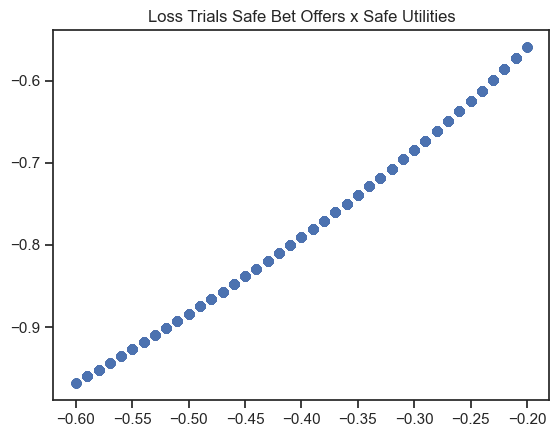

In [79]:
#Do utilities make sense based on offer values? 
plt.scatter(dual_risk_loss_df.safe_bet, dual_risk_loss_df.util_safe)
plt.title('Loss Trials Safe Bet Offers x Safe Utilities')

Text(0.5, 1.0, 'Mix Trials Safe Bet Offers x Safe Utilities')

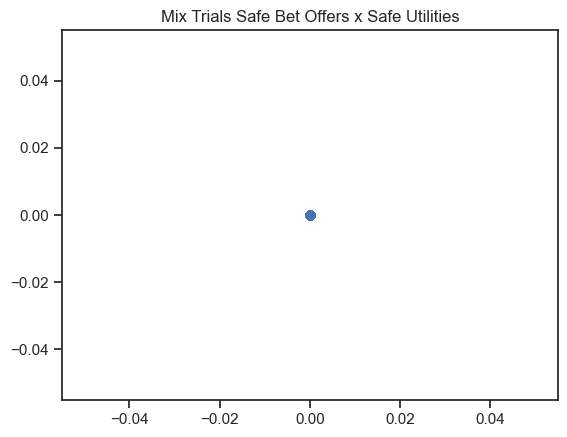

In [80]:
#Mix Trials - Do utilities make sense based on offer values? 
plt.scatter(dual_risk_mix_df.safe_bet, dual_risk_mix_df.util_safe)
plt.title('Mix Trials Safe Bet Offers x Safe Utilities')

Text(0.5, 1.0, 'Gain Trials Safe Bet Offers x Safe Utilities')

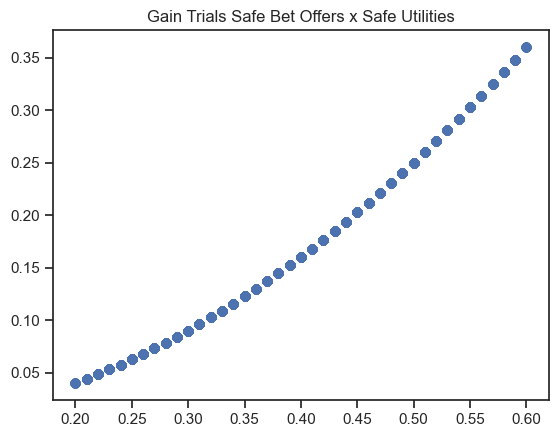

In [81]:
#Gain Trials - Do utilities make sense based on offer values? 
plt.scatter(dual_risk_gain_df.safe_bet, dual_risk_gain_df.util_safe)
plt.title('Gain Trials Safe Bet Offers x Safe Utilities')

Text(0.5, 1.0, 'Loss Trials Low Bet Offers x Gamble Utilities')

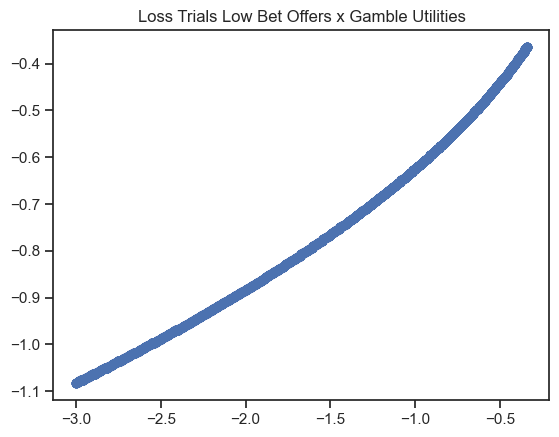

In [82]:
#Loss Trials - Do gamble utilities make sense based on low offer values? 
plt.scatter(dual_risk_loss_df.low_bet, dual_risk_loss_df.util_gamble)
plt.title('Loss Trials Low Bet Offers x Gamble Utilities')

Text(0.5, 1.0, 'Mix Trials Low Bet Offers x Gamble Utilities')

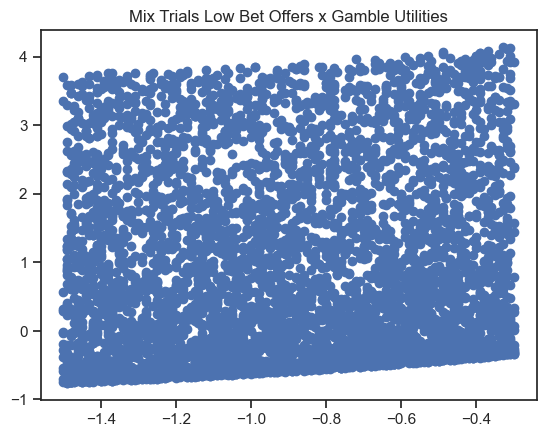

In [83]:
#Mix Trials - Do gamble utilities make sense based on low offer values? 
plt.scatter(dual_risk_mix_df.low_bet, dual_risk_mix_df.util_gamble)
plt.title('Mix Trials Low Bet Offers x Gamble Utilities')

Text(0.5, 1.0, 'Mix Trials High Bet Offers x Gamble Utilities')

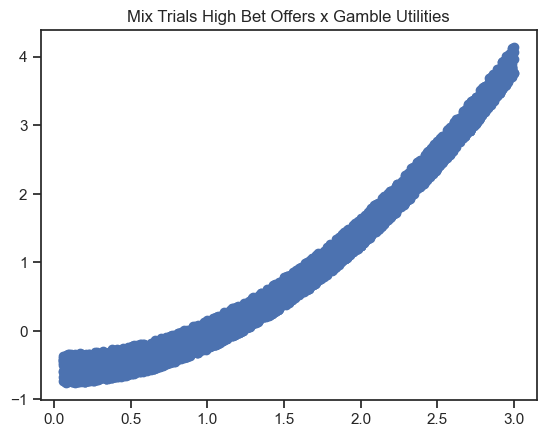

In [84]:
#Mix Trials - Do gamble utilities make sense based on high offer values? 
plt.scatter(dual_risk_mix_df.high_bet, dual_risk_mix_df.util_gamble)
plt.title('Mix Trials High Bet Offers x Gamble Utilities')

Text(0.5, 1.0, 'Gain Trials High Bet Offers x Gamble Utilities')

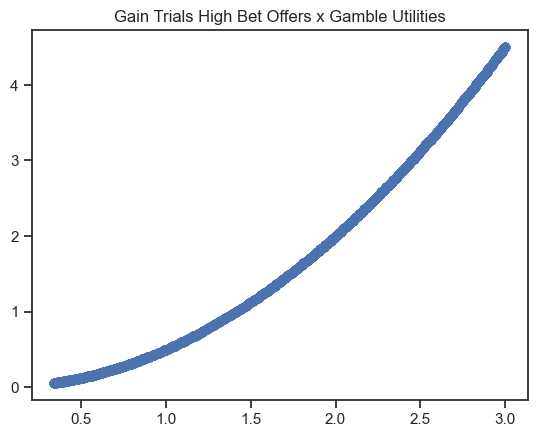

In [85]:
#Gain Trials - Do gamble utilities make sense based on high offer values? 
plt.scatter(dual_risk_gain_df.high_bet, dual_risk_gain_df.util_gamble)
plt.title('Gain Trials High Bet Offers x Gamble Utilities')

Text(0.5, 1.0, 'All Trials Safe Bet Offers x Safe Utilities')

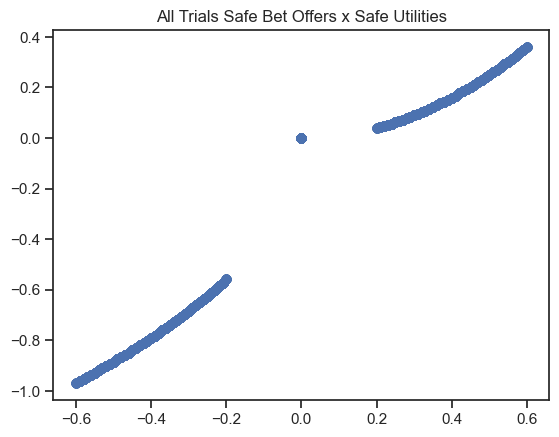

In [86]:
#All trials - utilities make sense based on offer values? 
plt.scatter(dual_risk_pt_sim_df.safe_bet, dual_risk_pt_sim_df.util_safe)
plt.title('All Trials Safe Bet Offers x Safe Utilities')

Text(0.5, 1.0, 'All Trials Gamble Expected Value x Gamble Utilities')

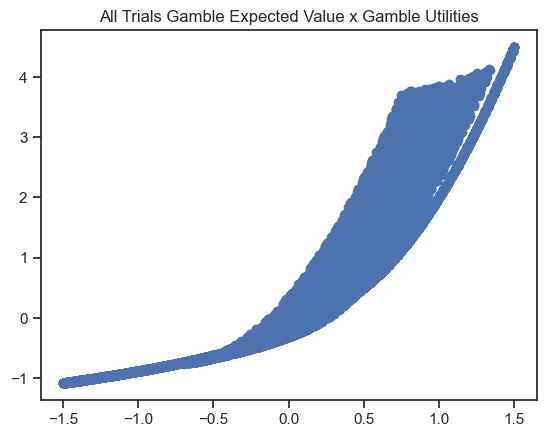

In [87]:
#All trials - Gamble utilities make sense based on offer values? 
dual_util_gamble_average = (dual_risk_pt_sim_df.high_bet+dual_risk_pt_sim_df.low_bet)/2

plt.scatter(dual_util_gamble_average, dual_risk_pt_sim_df.util_gamble)
plt.title('All Trials Gamble Expected Value x Gamble Utilities')

Do probabilities maek sense based on utilities? 

Text(0.5, 1.0, 'Safe Bet Probability x Utilities')

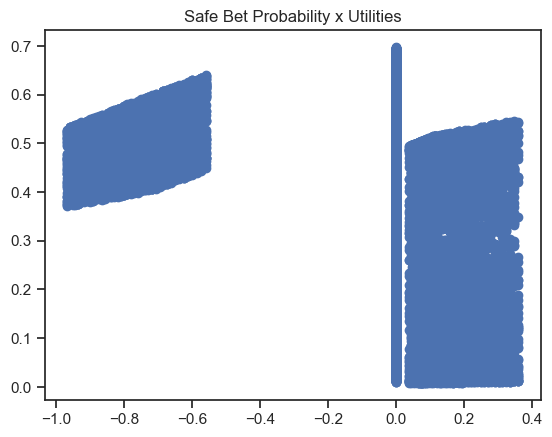

In [88]:
#Do probabilities make sense based on utilities?
plt.scatter(dual_risk_pt_sim_df.util_safe, dual_risk_pt_sim_df.p_safe)
plt.title('Safe Bet Probability x Utilities')



Text(0.5, 1.0, 'Gamble Bet Probability x Utilities')

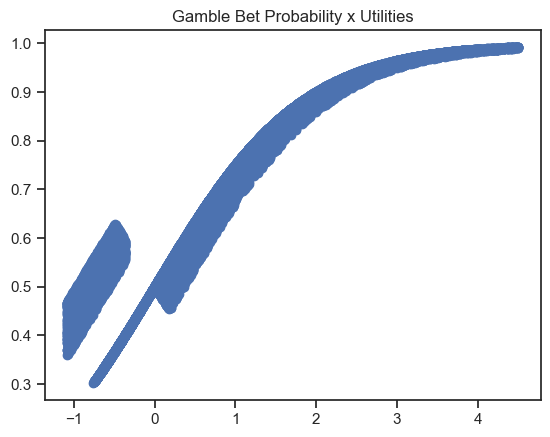

In [89]:
plt.scatter(dual_risk_pt_sim_df.util_gamble, dual_risk_pt_sim_df.p_gamble)
plt.title('Gamble Bet Probability x Utilities')


Do choices make sense based on offers?


In [90]:
loss,mix,gain = SWB_modeling_utils.simulation_norm_gamble_choices(dual_risk_pt_sim_df)


In [91]:
gamble_plot = pd.DataFrame(columns=['loss_x','loss_y','mix_x','mix_y','gain_x','gain_y'])

df={}
df['loss_x'] = loss['loss_x_axis']
df['loss_y'] = loss['loss_choice_props']

df['mix_x'] = mix['mix_x_axis']
df['mix_y'] =  mix['mix_choice_props']

df['gain_x'] = gain['gain_x_axis']
df['gain_y'] = gain['gain_choice_props']

gamble_plot = pd.concat([gamble_plot,pd.DataFrame(df)])

gamble_plot = gamble_plot.dropna(axis=0)

/Users/alexandrafink/opt/anaconda3/envs/swb_computational_modelling/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/alexandrafink/opt/anaconda3/envs/swb_computational_modelling/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/alexandrafink/opt/anaconda3/envs/swb_computational_modelling/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/alexandrafink/opt/anaconda3/envs/swb_computational_modelling/lib/python3

Text(0.5, 1.05, 'Influence of Expected Value on Gamble Decision')

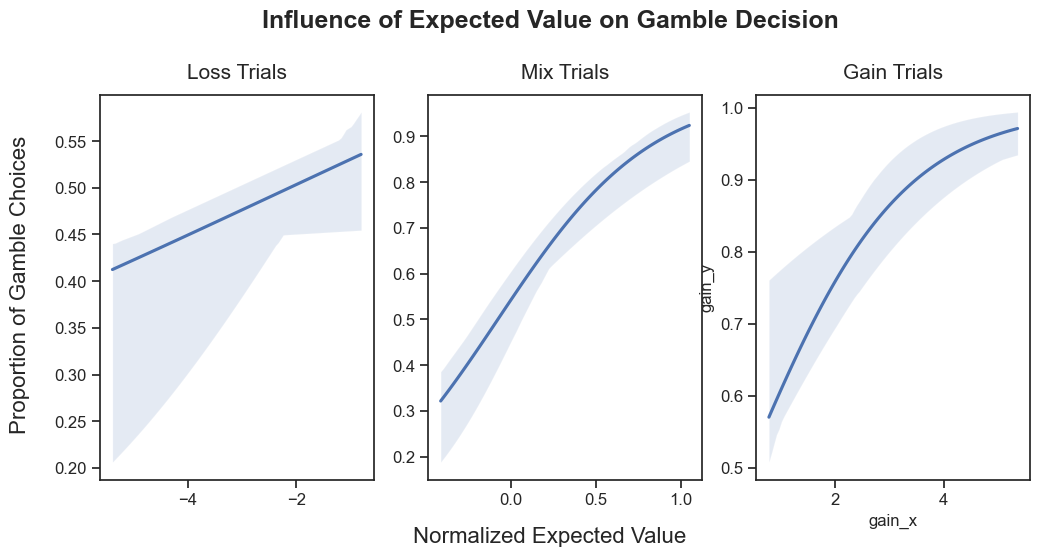

In [92]:
#Do choices make sense based on offers?

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,5))
sns.set_theme(style='ticks',font='Arial') #magma_r,gnuplot,paired,cubehelix_r
sns.regplot(data=gamble_plot,ax=ax1,x='loss_x',y='loss_y',ci=95,logistic=True,scatter=False)
sns.regplot(data=gamble_plot,ax=ax2,x='mix_x',y='mix_y',ci=95,logistic=True,scatter=False)
sns.regplot(data=gamble_plot,ax=ax3,x='gain_x',y='gain_y',ci=95,logistic=True,scatter=False)
ax1.set_ylabel(None)
ax1.set_xlabel(None)
ax1.tick_params(labelsize=12)
ax1.set_title('Loss Trials',weight='medium',fontsize=15,y=1.02)
ax2.set_ylabel(None)
ax2.set_xlabel(None)
ax2.tick_params(labelsize=12)
ax2.set_title('Mix Trials',weight='medium',fontsize=15,y=1.02)
ax3.tick_params(labelsize=12)
ax3.set_title('Gain Trials',weight='medium',fontsize=15,y=1.02)
fig.supxlabel('Normalized Expected Value',y=-0.025,weight='medium',fontsize=16)
fig.supylabel('Proportion of Gamble Choices',x=0.05,weight='medium',fontsize=16)
fig.suptitle('Influence of Expected Value on Gamble Decision',y=1.05,weight='semibold',fontsize=18)

Do choices make sense based on utilities? 

In [93]:

loss_util,mix_util,gain_util = SWB_modeling_utils.simulation_util_norm_gamble_choices(dual_risk_pt_sim_df)


In [94]:
gamble_plot_util = pd.DataFrame(columns=['loss_x','loss_y','mix_x','mix_y','gain_x','gain_y'])

df_util={}
df_util['loss_x'] = loss_util['loss_x_axis']
df_util['loss_y'] = loss_util['loss_choice_props']

df_util['mix_x'] = mix_util['mix_x_axis']
df_util['mix_y'] =  mix_util['mix_choice_props']

df_util['gain_x'] = gain_util['gain_x_axis']
df_util['gain_y'] = gain_util['gain_choice_props']

gamble_plot_util = pd.concat([gamble_plot_util,pd.DataFrame(df_util)])

gamble_plot_util = gamble_plot_util.dropna(axis=0)

/Users/alexandrafink/opt/anaconda3/envs/swb_computational_modelling/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/alexandrafink/opt/anaconda3/envs/swb_computational_modelling/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/alexandrafink/opt/anaconda3/envs/swb_computational_modelling/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/alexandrafink/opt/anaconda3/envs/swb_computational_modelling/lib/python3

Text(0.5, 1.05, 'Influence of Gamble Utility on Decision')

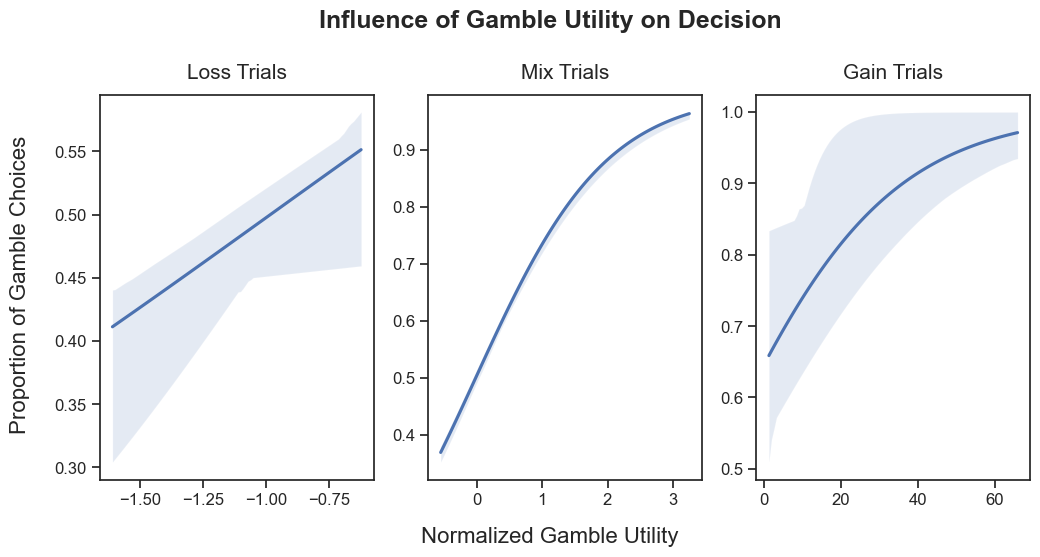

In [95]:
#Do choices make sense based on utilities?

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,5))
sns.set_theme(style='ticks',font='Arial') #magma_r,gnuplot,paired,cubehelix_r
sns.regplot(data=gamble_plot_util,ax=ax1,x='loss_x',y='loss_y',ci=95,logistic=True,scatter=False)
sns.regplot(data=gamble_plot_util,ax=ax2,x='mix_x',y='mix_y',ci=95,logistic=True,scatter=False)
sns.regplot(data=gamble_plot_util,ax=ax3,x='gain_x',y='gain_y',ci=95,logistic=True,scatter=False)
ax1.set_ylabel(None)
ax1.set_xlabel(None)
ax1.tick_params(labelsize=12)
ax1.set_title('Loss Trials',weight='medium',fontsize=15,y=1.02)
ax2.set_ylabel(None)
ax2.set_xlabel(None)
ax2.tick_params(labelsize=12)
ax2.set_title('Mix Trials',weight='medium',fontsize=15,y=1.02)
ax3.set_ylabel(None)
ax3.set_xlabel(None)
ax3.tick_params(labelsize=12)
ax3.set_title('Gain Trials',weight='medium',fontsize=15,y=1.02)
fig.supxlabel('Normalized Gamble Utility',y=-0.025,weight='medium',fontsize=16)
fig.supylabel('Proportion of Gamble Choices',x=0.05,weight='medium',fontsize=16)
fig.suptitle('Influence of Gamble Utility on Decision',y=1.05,weight='semibold',fontsize=18)

<font size= 8> **Parameter Recovery** 

For each model:
1. Simulate fake data with known parameters
2. Fit model to fake data to "recover" parameters
3. Compare recovered parameters to known parameters

If the parameters recover, the recovered parameters will have the same distribution as the known parameters

In [297]:
import random

def param_init(n_values, n_iter, upper_bound, lower_bound, beta_shape=0, method):
    #inputs:
        #n_values: how many parameter values needed
        #n_iter: how many rounds of initialization; if method = 'rand' will return dict with array n_iter x n_values; if method = 'mc_grid' will return dict with grid n_iter x n_iter for each param (n_values)
        #upper_bound: max possible parameter value
        #lower_bound: min possible parameter value
        #beta_shape: [a,b] alpha and beta values for beta distribution
        #method: rand, mc_grid

    #outputs:
        #param array 

    if method == 'rand':
        param_array = np.zeros(shape=(n_iter,n_values))
        for iter in range(n_iter):
            for val in range(n_values):
                if iter%2==0:
                    param_array[iter,val] = random.uniform(lower_bound,lower_bound+1) #hacky way to bias random initialization to have more numbers between 0-1
                if iter%2!=0:
                    param_array[iter,val] = random.uniform(lower_bound,upper_bound)
    
    elif method == 'beta':
        a = beta_shape[0]
        b = beta_shape[1]
        N = n_iter

        param_array = (upper_bound - lower_bound) * np.random.beta(a, b, N) + lower_bound

    
    return param_array



option to bias distribution of parameters - 

# Parameter Recovery for Model 1: Base PT Model
free params: loss aversion, risk aversion, temp
constraints: 
- risk aversion - non negative, risk neutral = 1, risk seeking > 1, risk averse <1 (constrain 0-6 for now, can amend later, rutledge constrained to 0.3-1.3, charpentier btwn 0,3)
- loss aversion - non negative, loss neutral = 1, loss averse > 1, not loss averse <1 (constrain 0-6 for now, can amend later, rutledge constrained to 0.5-5, charpentier btwn 0,5)
- inverse temp - non negative, 0 to inf (degree of stochasticity in choice behavior, constrain 0-10 for now)


### Step 1 - simulation with known parameters

In [298]:
#param recovery step 1 - simulation with known parameters
number_of_trials = 150
number_of_reps = 100

risk_aversion = param_init(n_values=1, n_iter=number_of_reps, upper_bound=5, lower_bound=0, method='rand')
loss_aversion = param_init(n_values=1, n_iter=number_of_reps, upper_bound=5, lower_bound=0, method='rand')
inverse_temp = param_init(n_values=1, n_iter=number_of_reps, upper_bound=10, lower_bound=0, method='rand')

In [299]:
df_base_pt = {}

for r in range(number_of_reps):
    risk = risk_aversion[r]
    loss = loss_aversion[r]
    temp = inverse_temp[r]

    base_prospect_sim = SWB_modeling_utils.pt_base_simulation((risk,loss,temp),1,number_of_trials)
    df_base_pt[r] = base_prospect_sim



### Step 2 - estimate params with simulated dataset 

In [300]:
#param recovery step 2 - estimate params with simulated dataset 
base_pt_recovery_dict = {}
risk_estimations = []
loss_estimations = []
temp_estimations = []
for r in range(number_of_reps):
    df = df_base_pt[r]
    #free parameters: risk aversion, loss aversion, inverse temperature
    risk_inits = param_init(n_values=1, n_iter=3, upper_bound=5, lower_bound=0, method='rand')
    loss_inits = param_init(n_values=1, n_iter=3, upper_bound=5, lower_bound=0, method='rand')
    temp_inits = param_init(n_values=1, n_iter=3, upper_bound=10, lower_bound=0, method='rand')
    risk_est, loss_est, temp_est, bic_est, optim_inits = SWB_modeling_utils.recover_base_pt(df,risk_inits,loss_inits,temp_inits)
    risk_estimations.append(risk_est)
    loss_estimations.append(loss_est)
    temp_estimations.append(temp_est)
    base_pt_recovery_dict[r] = {'risk_estimation':risk_est,
                                'loss_estimation':loss_est,
                                'temp_estimation':temp_est,
                                'bic_estimation':bic_est,
                                'optim_inits':optim_inits,

    }

    

### Step 3 - Compare known and estimated parameters

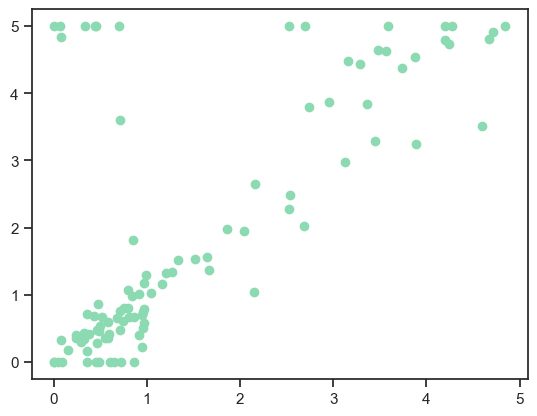

In [301]:
#plot estimated risk aversion parameters with known risk aversion parameters

plt.scatter(risk_aversion, risk_estimations)

In [302]:
from scipy.stats import pearsonr
risk = risk_aversion.reshape(100)
corr, _ = pearsonr(risk, risk_estimations)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.699


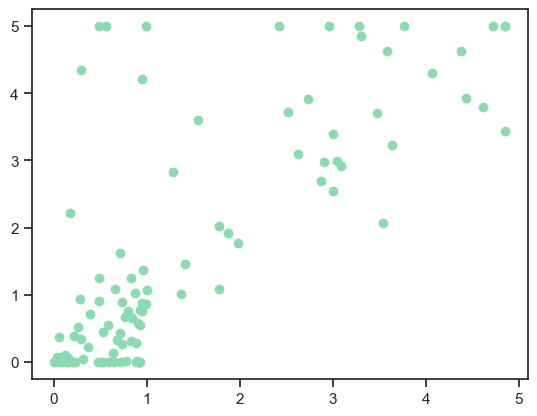

In [303]:
#plot estimated loss aversion parameters with known loss aversion parameters
plt.scatter(loss_aversion, loss_estimations)


In [304]:
from scipy.stats import pearsonr
loss = loss_aversion.reshape(100)
corr, _ = pearsonr(loss, loss_estimations)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.768


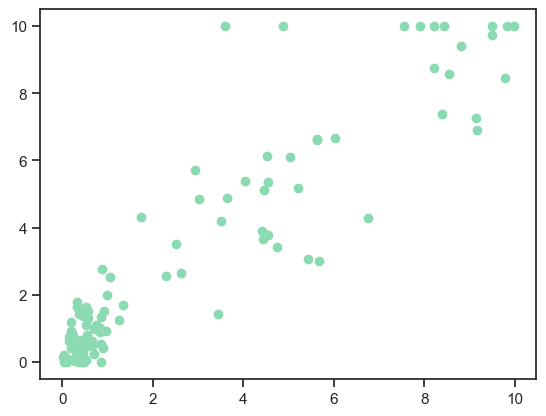

In [305]:
#plot estimated inverse temp parameters with known inverse temp parameters

plt.scatter(inverse_temp, temp_estimations)


In [306]:
from scipy.stats import pearsonr
temp = inverse_temp.reshape(100)
corr, _ = pearsonr(temp, temp_estimations)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.923


# Parameter Recovery for Model 2: Dual Risk PT Model
free params: loss aversion, gain risk aversion, loss risk aversion, temp
constraints: 
- loss aversion - non negative, loss neutral = 1, loss averse > 1, not loss averse <1 (constrain 0-20 for now, can amend later, rutledge constrained to 0.5-5)
- gain risk aversion - non negative, risk neutral = 1, risk seeking > 1, risk averse <1 (constrain 0-20 for now, can amend later, rutledge constrained to 0.3-1.3)
- loss risk aversion - non negative, risk neutral = 1, risk averse > 1, risk seeking < 1 (constrain 0-20 for now, can amend later, rutledge constrained to 0.3-1.3) *opposite curvature for loss risk aversion!
- inverse temp - non negative, 0 to inf (degree of stochasticity in choice behavior)


### Step 1 - simulation with known parameters

In [309]:
#param recovery step 1 - simulation with known parameters
number_of_trials = 150
number_of_reps = 100

risk_gain_aversion = param_init(n_values=1, n_iter=number_of_reps, upper_bound=5, lower_bound=0, method='rand')
risk_loss_aversion = param_init(n_values=1, n_iter=number_of_reps, upper_bound=5, lower_bound=0, method='rand')
loss_aversion = param_init(n_values=1, n_iter=number_of_reps, upper_bound=5, lower_bound=0, method='rand')
inverse_temp = param_init(n_values=1, n_iter=number_of_reps, upper_bound=10, lower_bound=0, method='rand')

In [310]:
df_dual_risk_pt = {}

for r in range(number_of_reps):
    risk_gain = risk_gain_aversion[r]
    risk_loss = risk_loss_aversion[r]
    loss = loss_aversion[r]
    temp = inverse_temp[r]

    dual_risk_sim = SWB_modeling_utils.pt_dual_risk_simulation((risk_gain,risk_loss,loss,temp),1,number_of_trials)
    df_dual_risk_pt[r] = dual_risk_sim



### Step 2 - Estimate params with simulated dataset

In [311]:
#param recovery step 2 - estimate params with simulated dataset 
dual_pt_recovery_dict = {}
risk_gain_estimations = []
risk_loss_estimations = []
loss_estimations = []
temp_estimations = []
for r in range(number_of_reps):
    df = df_dual_risk_pt[r]
    #free parameters: risk aversion, loss aversion, inverse temperature
    risk_gain_inits = param_init(n_values=1, n_iter=4, upper_bound=5, lower_bound=0, method='rand')
    risk_loss_inits = param_init(n_values=1, n_iter=4, upper_bound=5, lower_bound=0, method='rand')
    loss_inits = param_init(n_values=1, n_iter=4, upper_bound=5, lower_bound=0, method='rand')
    temp_inits = param_init(n_values=1, n_iter=4, upper_bound=10, lower_bound=0, method='rand')
    risk_gain_est, risk_loss_est, loss_est, temp_est, bic_est, optim_inits = SWB_modeling_utils.recover_dual_risk_pt(df,risk_gain_inits,risk_loss_inits,loss_inits,temp_inits)
    risk_gain_estimations.append(risk_gain_est)
    risk_loss_estimations.append(risk_loss_est)
    loss_estimations.append(loss_est)
    temp_estimations.append(temp_est)
    dual_pt_recovery_dict[r] = {'risk_gain_estimation':risk_gain_est,
                                'risk_loss_estimation':risk_loss_est,
                                'loss_estimation':loss_est,
                                'temp_estimation':temp_est,
                                'bic_estimation':bic_est,
                                'optim_inits':optim_inits,

    }

    

### Step 3 - Compare known vs estimated parameters

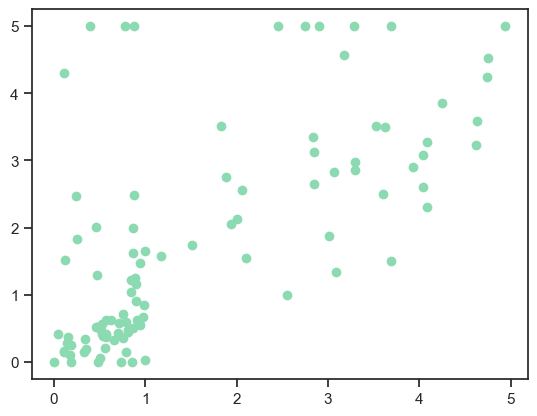

In [312]:
#plot estimated risk gain aversion parameters with known risk aversion parameters

plt.scatter(risk_gain_aversion, risk_gain_estimations)

In [313]:
from scipy.stats import pearsonr
risk_gain = risk_gain_aversion.reshape(100)
corr, _ = pearsonr(risk_gain, risk_gain_estimations)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.686


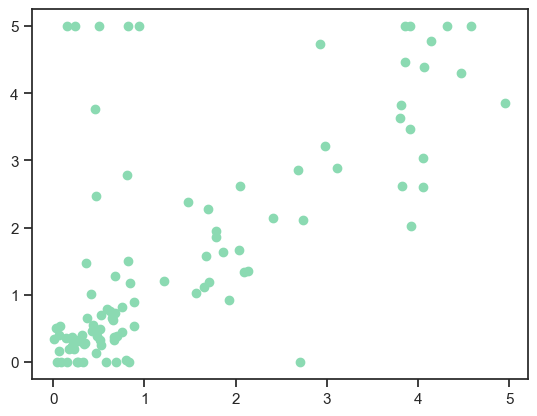

In [314]:
#plot estimated risk loss aversion parameters with known risk aversion parameters

plt.scatter(risk_loss_aversion, risk_loss_estimations)

In [315]:

risk_loss = risk_loss_aversion.reshape(100)
corr, _ = pearsonr(risk_loss, risk_loss_estimations)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.685


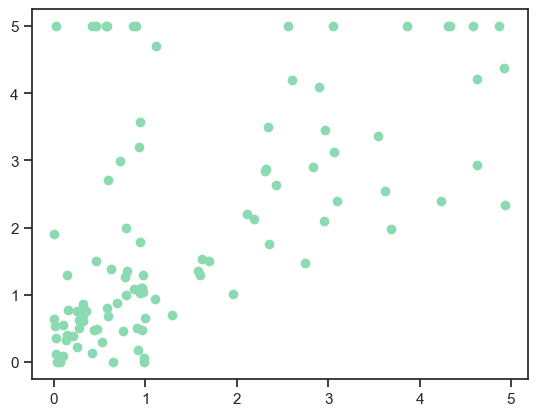

In [316]:
#plot estimated loss aversion parameters with known loss aversion parameters

plt.scatter(loss_aversion, loss_estimations)

In [317]:
loss = loss_aversion.reshape(100)
corr, _ = pearsonr(loss, loss_estimations)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.574


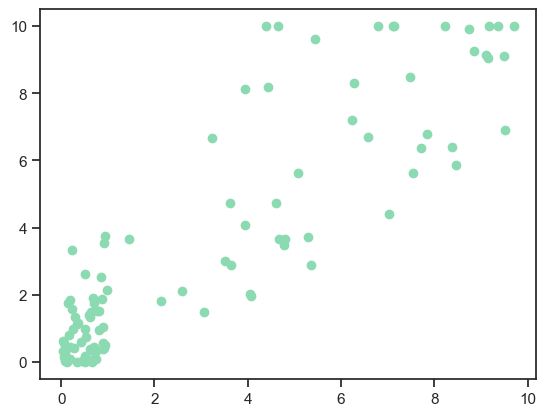

In [318]:
#plot estimated inverse temp parameters with known inverse temp parameters

plt.scatter(inverse_temp, temp_estimations)

In [319]:
temp = inverse_temp.reshape(100)
corr, _ = pearsonr(temp, temp_estimations)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.885


<font size= 6> **Model Recovery** 

For each model:
1. Simulate mulitple repetitions of model 
2. Fit simulated data back to model and competing models
3. Compute BIC score for each model's fit
4. Compare BIC scores (lower = better model fit)

If the model recovers, it will best fit the data simulated from itself compared to competing models. If a competing model fits the simulated data better, the model is not recoverable.

To dos: 
- plot confusion matrix of p(fit model | simulated model), the probability that the data simulated by one model is best fit by another
- beware of parameters chosen to simulate models - this can make a huge difference

# Model Recovery for Model 1: Base PT Model

### Step 1- Simulate data from model 1 (already done in parameter recovery)

In [324]:
model1_sim_df = df_base_pt


### Step 2- run models 1 and 2 on base pt simulated df

Model 1 already fit on data in parameter recovery - need to extract BIC values

In [373]:
model1_recovery_dict = base_pt_recovery_dict

In [374]:
#extract BICs from dict
model1_sim_model1_BIC = []

for m in range(len(model1_recovery_dict)):
    bic = model1_recovery_dict[m]['bic_estimation']
    model1_sim_model1_BIC.append(bic)

Run model 2 on model 1 simulated df

In [375]:
number_of_reps = 100 
model1_sim_model2_recover_dict = {}
model1_sim_model2_BIC = []

for r in range(number_of_reps):
    df = model1_sim_df[r]
    #free parameters: risk aversion (gain/loss), loss aversion, inverse temperature
    risk_gain_inits = param_init(n_values=1, n_iter=4, upper_bound=5, lower_bound=0, method='rand')
    risk_loss_inits = param_init(n_values=1, n_iter=4, upper_bound=5, lower_bound=0, method='rand')
    loss_inits = param_init(n_values=1, n_iter=4, upper_bound=5, lower_bound=0, method='rand')
    temp_inits = param_init(n_values=1, n_iter=4, upper_bound=10, lower_bound=0, method='rand')
    risk_gain_est, risk_loss_est, loss_est, temp_est, bic_est, optim_inits = SWB_modeling_utils.recover_dual_risk_pt(df,risk_gain_inits,risk_loss_inits,loss_inits,temp_inits)
    model1_sim_model2_BIC.append(bic_est)
    model1_sim_model2_recover_dict[r] = {'risk_gain_estimation':risk_gain_est,
                                'risk_loss_estimation':risk_loss_est,
                                'loss_estimation':loss_est,
                                'temp_estimation':temp_est,
                                'bic_estimation':bic_est,
                                'optim_inits':optim_inits,
    }


### Step 3- Get conf matrix data for model 1 recovery

In [376]:
model1_sim_bic_zip = list(zip(model1_sim_model1_BIC,model1_sim_model2_BIC))
model1_sim_low_bic_idx = [int(np.where(b == min(b))[0]) for b in model1_sim_bic_zip ]



In [382]:
#make confusion matrix 
conf_mat_model1 = np.array([[0,0]])
conf_mat_model1[0,0] = np.count_nonzero(np.array(model1_sim_low_bic_idx)==0)
conf_mat_model1[0,1] = np.count_nonzero(np.array(model1_sim_low_bic_idx)==1)

labels = ['base_pt','dual_risk_pt']

In [383]:
conf_mat_model1

array([[99,  1]])

# Model Recovery for Model 2: Dual Risk PT Model


### Step 1- Simulate data from model 2 (already done in parameter recovery)

In [325]:
model2_sim_df = df_dual_risk_pt

### Step 2- run models 1 and 2 on dual risk pt simulated df

Model 2 already fit on data in parameter recovery - need to extract BIC values

In [335]:
model2_recovery_dict = dual_pt_recovery_dict 


In [336]:
#extract BICs from dict
model2_sim_model2_BIC = []

for m in range(len(model2_recovery_dict)):
    bic = model2_recovery_dict[m]['bic_estimation']
    model2_sim_model2_BIC.append(bic)

Run model 1 on model 2 simulated df

In [339]:
number_of_reps = 100 
model2_sim_model1_recover_dict = {}
model2_sim_model1_BIC = []


for r in range(number_of_reps):
    df = model2_sim_df[r]
    #free parameters: risk aversion, loss aversion, inverse temperature
    risk_inits = param_init(n_values=1, n_iter=3, upper_bound=5, lower_bound=0, method='rand')
    loss_inits = param_init(n_values=1, n_iter=3, upper_bound=5, lower_bound=0, method='rand')
    temp_inits = param_init(n_values=1, n_iter=3, upper_bound=10, lower_bound=0, method='rand')
    risk_est, loss_est, temp_est, bic_est, optim_inits = SWB_modeling_utils.recover_base_pt(df,risk_inits,loss_inits,temp_inits)
    model2_sim_model1_BIC.append(bic_est)
    model2_sim_model1_recover_dict[r] = {'risk_estimation':risk_est,
                                'loss_estimation':loss_est,
                                'temp_estimation':temp_est,
                                'bic_estimation':bic_est,
                                'optim_inits':optim_inits,

    }



### Step 3- Get conf matrix data for model 2 recovery

In [385]:
model2_sim_bic_zip = list(zip(model2_sim_model2_BIC,model2_sim_model1_BIC))

In [386]:
model2_sim_low_bic_idx = [int(np.where(b == min(b))[0]) for b in model2_sim_bic_zip ]



In [387]:
#make confusion matrix 
conf_mat_model2 = np.array([[0,0]])
conf_mat_model2[0,0] = np.count_nonzero(np.array(model2_sim_low_bic_idx)==1)
conf_mat_model2[0,1] = np.count_nonzero(np.array(model2_sim_low_bic_idx)==0)

labels = ['base_pt','dual_risk_pt']

In [388]:
conf_mat_model2

array([[72, 28]])

## Plot Model Recovery Conf Mat

In [ ]:
#param recovery step 3 - compare known vs estimated parameters
#https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
#https://realpython.com/numpy-scipy-pandas-correlation-python/
#https://www.statology.org/correlation-in-python/
#https://stackabuse.com/calculating-pearson-correlation-coefficient-in-python-with-numpy/
#https://datatofish.com/correlation-matrix-pandas/
#https://medium.com/mlearning-ai/heatmap-for-correlation-matrix-confusion-matrix-extra-tips-on-machine-learning-b0377cee31c2
#https://datagy.io/python-correlation-matrix/

